# Prediction of hospital length of stay

### Diabetes 130-US hospitals for years 1999-2008 Data Set 
- Data come from the machine Learning Repo https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008
- Riche dataset but dirty 

## Descriptive statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

 determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care.
 
What factors are the strongest predictors of hospital readmission in diabetic patients?
How well can we predict hospital readmission in this dataset with limited features?

In [2]:
# Load the files 
diabetes=pd.read_csv('diabetic_data.csv')
mapp=pd.read_csv('IDs_mapping.csv')

We can see a mix of categorical (non numeric) and numerical data

In [3]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
diabetes[['diag_1','diag_2','diag_3']].head()

,diag_1,diag_2,diag_3
0,250.83,?,?
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250


101,766 observations over 10 years. The dataset has over 50 features including patient characteristics, conditions, tests and 23 medications

Examine the data types and descriptive stats

In [6]:
diabetes.shape

(101766, 50)

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [8]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#  **  **  **  **

## Categorical columns

In [9]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### Cleaning tasks: dropping bad data, dealing with missing values

- Weight is missing in over 98% records. 
- Payer code and Medical Specialty of treating physician also have 40–50% missing values. We will just DROP them !
- examide and citolglipton have the value 1 only. DROP THEM !!
- encounter_id and patient_nbr: these are just identifiers and not useful variables.
- diag_1, diag_2, diag_3, have a lot of values (group these ICD codes to reduce the dimension)

Primary (diag_1), Secondary (diag_2) and Additional (diag_3) diagnoses were have very few missing values. Technically, if all three are missing, that’s bad data. So we only drop those records where all three diagnoses are missing.


In [10]:
diabetes = diabetes.drop(['encounter_id','patient_nbr','weight','payer_code','citoglipton', 'examide'],axis = 1)


### Gender

Gender has only 3 missing or invalid values so we decided to drop these records.
Gender was coded differently 


In [11]:
print('gender', diabetes['gender'][diabetes['gender'] == 'Unknown/Invalid'].count())
diabetes= diabetes[diabetes['gender'] != 'Unknown/Invalid']


gender 3


### Missing values (?)

Missing values are are coded as “?” for most variables in the data

In [12]:
diabetes = diabetes.replace('?', np.nan)
#diabetes= diabetes.dropna(thresh=3)

In [13]:
#diabetes#.str.contains('?').all(axis=1)
diabetes = diabetes[~(diabetes[['diag_1', 'diag_2', 'diag_3']] == "?").all(1)]

In [14]:
diabetes.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### Rename variables

In [15]:
diabetes.rename({'discharge_disposition_id': 'discharge', 'number_inpatient':'number_admissions'
                ,'admission_type_id':'emergency'}, axis=1, inplace=True)


### Discharge

discharge_disposition_id, tells us where the patient went after the hospitalization. 
IDs_mapping.csv provided by UCI we can see that 11,13,14,19,20,21 are related to death or hospice. We should remove these samples from the predictive model since they cannot be readmitted.


In [16]:
diabetes= diabetes.loc[~diabetes.discharge.isin([11,13,14,18,19,20,21,25,26])]

### Age

Simplify the age feature : choose the mean 

In [17]:
diabetes.age.value_counts()

[70-80)     24004
[60-70)     20981
[50-60)     16228
[80-90)     15818
[40-50)      9114
[30-40)      3602
[90-100)     2503
[20-30)      1595
[10-20)       665
[0-10)        150
Name: age, dtype: int64

In [18]:
age_dict=dict()
age_dict={'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, 
          '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85,'[90-100)':95}
diabetes['age_mean'] = diabetes.age.replace(age_dict)


In [19]:
diabetes.age_mean.value_counts()

75    24004
65    20981
55    16228
85    15818
45     9114
35     3602
95     2503
25     1595
15      665
5       150
Name: age_mean, dtype: int64

### Medical specialty

In [20]:
top_specialties= diabetes['medical_specialty'].value_counts()[:15].index.tolist()
diabetes['med_specialty']= diabetes.medical_specialty.copy()
diabetes.loc[~diabetes.med_specialty.isin(top_specialties),'med_specialty']='Other'
diabetes['med_specialty'].value_counts()


Other                              49317
InternalMedicine                   14019
Emergency/Trauma                    7410
Family/GeneralPractice              6702
Cardiology                          5158
Surgery-General                     2988
Nephrology                          1500
Orthopedics                         1187
Orthopedics-Reconstructive          1185
Radiologist                         1121
Pulmonology                          842
Psychiatry                           825
ObstetricsandGynecology              632
Urology                              627
Surgery-Cardiovascular/Thoracic      622
Surgery-Vascular                     525
Name: med_specialty, dtype: int64

### Cleaned Dataframe V1

In [21]:
diabetes=diabetes.copy()

In [22]:
diabetes.head()

,race,gender,age,emergency,discharge,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_mean,med_specialty
1,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,...,No,No,No,No,No,Ch,Yes,>30,15,Other
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,5,...,No,No,No,No,No,No,Yes,NO,25,Other
3,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,...,No,No,No,No,No,Ch,Yes,NO,35,Other
4,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,...,No,No,No,No,No,Ch,Yes,NO,45,Other
5,Caucasian,Male,[50-60),2,1,2,3,NaN,31,6,...,No,No,No,No,No,No,Yes,>30,55,Other


In [23]:
diabetes.shape

(94660, 46)

## Numerical columns

In [24]:
diabetes.columns

Index(['race', 'gender', 'age', 'emergency', 'discharge',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_admissions', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_mean', 'med_specialty'],
      dtype='object')

In [25]:
diabetes.emergency.value_counts()

1    50215
3    17688
2    17564
5     4616
6     4231
8      318
7       18
4       10
Name: emergency, dtype: int64

### New column : Create the Target

Create a target column to predict readmission (people likely to be readmitted within 30 days of discharge)
'readmitted' tells us if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.

In [26]:
diabetes['readmitted'].value_counts()

NO     49798
>30    34099
<30    10763
Name: readmitted, dtype: int64

In [27]:
diabetes['target']=(diabetes.readmitted=='<30').astype('int')

Percentage of people readmitted within 30 days
How many people were hospitalized within 30 days ?

In [28]:
nbreadmitted = len(diabetes[diabetes.target == 1])
print(f' Percentage of readmitted patients: {round(nbreadmitted/ (len(diabetes.target))*100,2)}%')
#11% patients are rehospotalized

 Percentage of readmitted patients: 11.37%


In [29]:
diabetes.target.value_counts()

0    83897
1    10763
Name: target, dtype: int64

### New column : Number of medication change for each patient

To simplify the model, let's calculate how many changes of medication in total for each patient

In [30]:
diabetes.columns

Index(['race', 'gender', 'age', 'emergency', 'discharge',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_admissions', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_mean', 'med_specialty', 'target'],
      dtype='object')

In [31]:
drugs = diabetes.columns[list(diabetes.columns).index('metformin'):list(diabetes.columns).index('metformin-pioglitazone')+1]
drugs

Index(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],
      dtype='object')

In [32]:
#Values of columns drugs
#Example
diabetes['metformin'].value_counts()

No        75745
Steady    17384
Up          990
Down        541
Name: metformin, dtype: int64

In [33]:
#change_medication= pd.DataFrame()
for drug in drugs:    
    diabetes[drug+'change'] = diabetes[drug].apply(lambda x: 0 if (x == 'No' or x=='Steady') else 1)
#change_medication['target']=diabetes.target


In [34]:
diabetes['num_change']= diabetes.loc[:,'metforminchange':'metformin-rosiglitazonechange'].sum(axis=1)


In [35]:
#change_medication.loc[:,:'metformin-rosiglitazonechange']
#change_medication['num_change']= change_medication.loc[:,:'metformin-rosiglitazonechange'].sum(axis=1)
#diabetes['num_change']=change_medication['num_change']

In [36]:
#change_medication.num_change.value_counts()

Done !!

### Recoding other features 

### Change 

In [37]:
diabetes['change'] = diabetes['change'].replace('Ch', 1)
diabetes['change'] = diabetes['change'].replace('No', 0)


### Gender

In [38]:
diabetes['gender'] = diabetes['gender'].replace('Male', 1)
diabetes['gender'] = diabetes['gender'].replace('Female', 0)


In [39]:
diabetes.gender.value_counts()

0    50957
1    43703
Name: gender, dtype: int64

### Diabetes medication or No

In [40]:
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace('Yes', 1)
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace('No', 0)


### Admission type

In [41]:
diabetes.emergency.value_counts()

1    50215
3    17688
2    17564
5     4616
6     4231
8      318
7       18
4       10
Name: emergency, dtype: int64

In [42]:
diabetes['emergency'] = diabetes['emergency'].replace([2,7],1)
diabetes['emergency'] = diabetes['emergency'].replace(3,0)
diabetes['emergency'] = diabetes['emergency'].replace([4,5,6,8],np.nan)


In [43]:
diabetes.emergency.value_counts()

1.0    67797
0.0    17688
Name: emergency, dtype: int64

In [44]:
diabetes=diabetes.dropna()

### Drop columns: Keeping only useful columns for the project

In [45]:
diabetes.drop(columns=['age','admission_source_id','readmitted','medical_specialty','discharge','num_lab_procedures',
               'num_medications','max_glu_serum','A1Cresult','diag_1','diag_2','diag_3'],inplace=True)


In [46]:
diabetes.drop(columns=drugs,inplace=True)


In [47]:
nbreadmitted = len(diabetes[diabetes.target == 1])
print(f' Percentage of readmitted patients: {round(nbreadmitted/ (len(diabetes.target))*100,2)}%')
#11% patients are rehospotalized

 Percentage of readmitted patients: 11.11%


In [48]:
diabetes=diabetes.reset_index(drop=True)

In [49]:
diabetes['med_specialty'].value_counts()

InternalMedicine                   12089
Emergency/Trauma                    7304
Family/GeneralPractice              5164
Cardiology                          4201
Other                               3135
Surgery-General                     2447
Nephrology                          1345
Orthopedics                         1120
Radiologist                         1096
Orthopedics-Reconstructive           723
Psychiatry                           685
Pulmonology                          657
Surgery-Cardiovascular/Thoracic      594
ObstetricsandGynecology              535
Urology                              517
Surgery-Vascular                     492
Name: med_specialty, dtype: int64

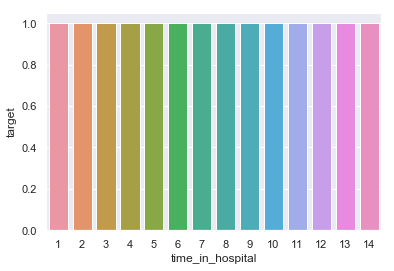

In [58]:
sns.barplot(x=diabetes.time_in_hospital, y=diabetes.target[diabetes.target==1] )
#pd.crosstab(diabetes.target,diabetes.race)

<Figure size 800x560 with 0 Axes>

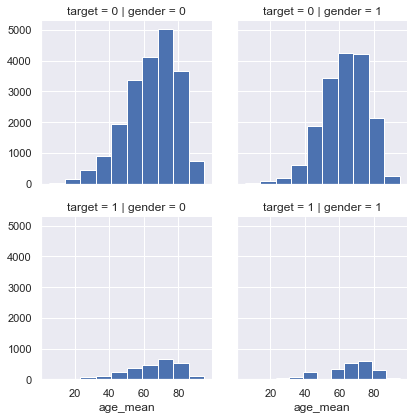

In [1143]:
plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')

g = sns.FacetGrid(diabetes, col="gender",  row="target")
g = g.map(plt.hist, 'age_mean')


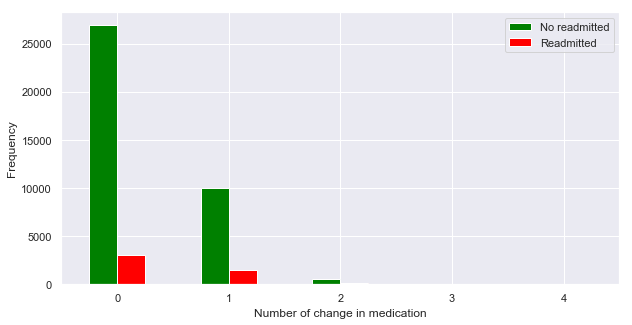

In [60]:
pd.crosstab(diabetes.num_change,diabetes.target).plot(kind="bar",figsize=(10,5),color=['Green','Red'])
plt.xlabel('Number of change in medication')
plt.xticks(rotation=0)
plt.legend(["No readmitted", "Readmitted"])
plt.ylabel('Frequency')
plt.show()





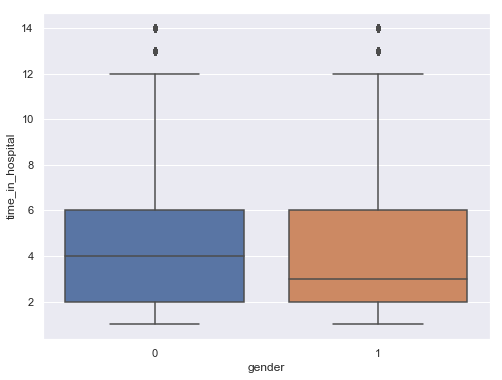

In [1186]:
plt.figure(num=None, figsize=(8, 6))

sns.boxplot(x='gender', y='time_in_hospital', data=diabetes)

In [50]:
df= pd.Series(diabetes.groupby(['med_specialty']).sum()['num_change'])

In [51]:
df

med_specialty
Cardiology                          926
Emergency/Trauma                   3518
Family/GeneralPractice             1565
InternalMedicine                   3257
Nephrology                          428
ObstetricsandGynecology             103
Orthopedics                         274
Orthopedics-Reconstructive          143
Other                               810
Psychiatry                          144
Pulmonology                         231
Radiologist                         240
Surgery-Cardiovascular/Thoracic     221
Surgery-General                     796
Surgery-Vascular                    172
Urology                              97
Name: num_change, dtype: int64

In [ ]:
plt.scatter(x=diabetes.num_change[diabetes.target==1], y=diabetes.[(diabetes.target==1)], c="red")
#plt.scatter(x=diabetes.num_change[diabetes.target==0], y=diabetes.thalach[(diabetes.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum heart rate achieved")
plt.show()

In [ ]:

plot = df.plot.pie(y='mass', figsize=(5, 5))

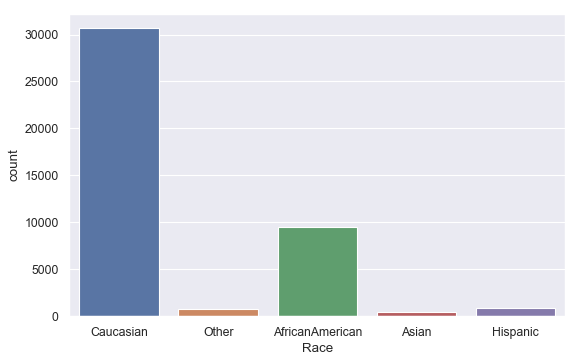

In [1156]:
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='race', data=diabetes)
plt.xlabel("Race")
plt.show()

### Create dummies <3 for categorical variable 'race' and 'medical_specialty'

#### Race

In [1044]:
dummy_race = pd.get_dummies(diabetes.race,drop_first=True)
diabetes= pd.concat([diabetes,dummy_race],axis=1)
diabetes.drop(['race'],axis=1,inplace=True)

#### medical_specialty

In [1045]:
dummy_specialty = pd.get_dummies(diabetes.med_specialty,drop_first=True)
diabetes= pd.concat([diabetes,dummy_specialty],axis=1)
diabetes.drop(['med_specialty'],axis=1,inplace=True)


#### Drop columns containing only zeros

In [768]:
#diabetes=diabetes.loc[:, (diabetes!= 0).any(axis=0)]
diabetes.drop(diabetes.sum()[diabetes.sum()==0].index, axis=1, inplace=True)

In [1051]:
diabetes.iloc[:,33:]

,num_change,Asian,Caucasian,Hispanic,Other,Emergency/Trauma,Family/GeneralPractice,InternalMedicine,Nephrology,ObstetricsandGynecology,Orthopedics,Orthopedics-Reconstructive,Other,Psychiatry,Pulmonology,Radiologist,Surgery-Cardiovascular/Thoracic,Surgery-General,Surgery-Vascular,Urology
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1085]:
sns.FacetGrid


,gender,emergency,time_in_hospital,num_procedures,number_outpatient,number_emergency,number_admissions,number_diagnoses,change,diabetesMed,...,Orthopedics,Orthopedics-Reconstructive,Other,Psychiatry,Pulmonology,Radiologist,Surgery-Cardiovascular/Thoracic,Surgery-General,Surgery-Vascular,Urology
0,0,0.0,12,3,0,0,0,8,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,7,0,0,1,0,8,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,10,1,0,0,0,8,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,3,0,0,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,6,3,0,0,0,7,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1.0,2,2,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,1.0,5,0,0,0,0,8,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0,1.0,6,0,0,0,0,8,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,1.0,2,0,0,0,0,6,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,1.0,1,0,0,0,0,4,1,1,...,0,0,0,0,0,0,0,0,0,0


# Building models 

### Method1:  Training samples, Validation samples, Test samples

Using randomized data 70% train, 15% validation, and 15% test

In [769]:
data_sample= diabetes.sample(n=len(diabetes),random_state=42)
data_sample_readmitted = len(data_sample[data_sample.target == 1])
print(f' Percentage of readmitted patients: {round(nbreadmitted/ (len(data_sample.target))*100,2)}%')
# Validation + Test
test=data_sample.sample(frac=0.3,random_state=42)
data_test=test.sample(frac=0.5,random_state=42)
data_validation=test.drop(data_test.index)

X_train=data_train.values
X_valid=data_validation.values
X_test=data_validation.values

y_train=data_train['target'].values
y_valid=data_validation['target'].values
y_test=data_validation['target'].values

 Percentage of readmitted patients: 11.11%


The prevalence is almost the same for all the groups

In [364]:
data_train=data_sample.drop(test.index)
data_train_readmitted = len(data_train[data_train.target == 1])
print(f' Percentage of data train readmitted: {round(data_train_readmitted/ (len(data_train.target))*100,2)}%')
data_test_readmitted = len(data_test[data_test.target == 1])
print(f' Percentage of data test readmitted: {round(data_test_readmitted/ (len(data_test.target))*100,2)}%')

data_validation_readmitted = len(data_validation[data_validation.target == 1])
print(f' Percentage of data validation readmitted: {round(data_validation_readmitted/ (len(data_validation.target))*100,2)}%')


 Percentage of data train readmitted: 10.95%
 Percentage of data test readmitted: 11.78%
 Percentage of data validation readmitted: 11.18%


### Method2: 

In [770]:
diabetes_notarget=diabetes.copy()
diabetes_notarget=diabetes_notarget.drop('target',axis=1)

### Weighting data

In [1052]:
from sklearn.model_selection import train_test_split
diabetes_notarget=diabetes.copy()
diabetes_notarget=diabetes_notarget.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(diabetes_notarget, diabetes.target, test_size = 0.3, random_state = 42)


### Selecting models

#### Logistic regression

#### Method1

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression(random_state=42)
result= model_lr.fit(X_train,y_train)
result.predict()
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train)
result = logit.fit()
print(result.summary2())

#### Method2

In [1062]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78     11197
           1       0.17      0.51      0.25      1435

   micro avg       0.66      0.66      0.66     12632
   macro avg       0.54      0.59      0.52     12632
weighted avg       0.83      0.66      0.72     12632



##### RFE (Recursive Feature Elimination)

In [1055]:
from sklearn.feature_selection import RFE
selector = RFE(logmodel, 20, step=1)
selector = selector.fit(X_train, y_train)
ls = list(X_train.columns[selector.support_])
ls

['number_admissions',
 'diabetesMed',
 'nateglinidechange',
 'chlorpropamidechange',
 'glimepiridechange',
 'glipizidechange',
 'pioglitazonechange',
 'rosiglitazonechange',
 'miglitolchange',
 'insulinchange',
 'glyburide-metforminchange',
 'Family/GeneralPractice',
 'Nephrology',
 'ObstetricsandGynecology',
 'Orthopedics',
 'Other',
 'Psychiatry',
 'Surgery-Cardiovascular/Thoracic',
 'Surgery-Vascular',
 'Urology']

In [826]:
X_train[ls].columns

Index(['number_admissions', 'diabetesMed', 'nateglinidechange',
       'chlorpropamidechange', 'glimepiridechange', 'glipizidechange',
       'pioglitazonechange', 'rosiglitazonechange', 'miglitolchange',
       'insulinchange', 'glyburide-metforminchange', 'Family/GeneralPractice',
       'Nephrology', 'ObstetricsandGynecology', 'Orthopedics', 'Other',
       'Other', 'Psychiatry', 'Surgery-Cardiovascular/Thoracic',
       'Surgery-Vascular', 'Urology'],
      dtype='object')

In [1063]:
from sklearn.linear_model import LogisticRegression
logmodel_rfe = LogisticRegression(class_weight='balanced')
logmodel_rfe.fit(X_train[ls],y_train)
predictions_logmodel_rfe = logmodel1.predict(X_test[ls])
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_logmodel_rfe))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82     11197
           1       0.18      0.45      0.26      1435

   micro avg       0.71      0.71      0.71     12632
   macro avg       0.55      0.60      0.54     12632
weighted avg       0.83      0.71      0.76     12632



In [855]:
y_train.value_counts()

0    26231
1     3241
Name: target, dtype: int64

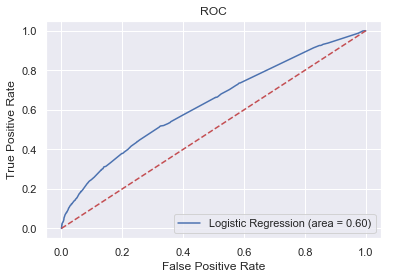

In [828]:
# Roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logmodel1.predict(X_test[ls]))
fpr, tpr, thresholds = roc_curve(y_test, logmodel1.predict_proba(X_test[ls])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
#plt.savefig(‘Log_ROC’)
plt.show()

In [501]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
score = logmodel.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
print(score)

[[11174    23]
 [ 1404    31]]
0.8870329322355921


In [829]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, predictions_new))
print(precision_score(y_test, predictions_new))
print(recall_score(y_test, predictions_new))
print(f1_score(y_test, predictions_new))



0.7103388220392653
0.18282943525385054
0.4466898954703833
0.2594616474397895


### Decision tree

In [1071]:
from sklearn.tree import DecisionTreeClassifier
model_tree= DecisionTreeClassifier(max_depth=50, 
                                   random_state=42, 
                                   class_weight='balanced')
model_tree.fit(X_train,y_train)
predictions_tree = model_tree.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11197
           1       0.13      0.15      0.14      1435

   micro avg       0.79      0.79      0.79     12632
   macro avg       0.51      0.51      0.51     12632
weighted avg       0.80      0.79      0.80     12632



In [1069]:
from sklearn.tree import DecisionTreeClassifier
model_tree_rfe= DecisionTreeClassifier(max_depth=50, 
                                       random_state=42, 
                                   class_weight='balanced')
model_tree_rfe.fit(X_train[ls],y_train)
predictions_tree_rfe = model_tree_rfe.predict(X_test[ls])

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_tree_rfe))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79     11197
           1       0.17      0.48      0.25      1435

   micro avg       0.67      0.67      0.67     12632
   macro avg       0.54      0.59      0.52     12632
weighted avg       0.83      0.67      0.72     12632



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model_tree.predict(X_test[ls]))
fpr, tpr, thresholds = roc_curve(y_test, model_tree.predict_proba(X_test[ls])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
#plt.savefig(‘Log_ROC’)
plt.show()

### Random forest

In [1073]:
from sklearn.ensemble import RandomForestClassifier
model_rf_rfe= RandomForestClassifier(max_depth=7, random_state=42,
                                     class_weight='balanced',
                                     n_estimators=5,
                                     min_weight_fraction_leaf=0.05)
model_rf.fit(X_train,y_train)
predictions_rf = model_rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78     11197
           1       0.17      0.50      0.25      1435

   micro avg       0.66      0.66      0.66     12632
   macro avg       0.54      0.59      0.52     12632
weighted avg       0.83      0.66      0.72     12632



In [1075]:
from sklearn.ensemble import RandomForestClassifier
model_rf_rfe= RandomForestClassifier(max_depth=7, random_state=42,
                                     class_weight='balanced',
                                     n_estimators=5,
                                     min_weight_fraction_leaf=0.05)
model_rf_rfe.fit(X_train[ls],y_train)
predictions_rf_rfe = model_rf_rfe.predict(X_test[ls])
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_rf_rfe))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80     11197
           1       0.18      0.47      0.26      1435

   micro avg       0.69      0.69      0.69     12632
   macro avg       0.54      0.59      0.53     12632
weighted avg       0.83      0.69      0.74     12632



In [876]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test,predictions_rf_rfe))
print(precision_score(y_test, predictions_rf_rfe))
print(recall_score(y_test, predictions_rf_rfe))
print(f1_score(y_test, predictions_rf_rfe))
print(classification_report(y_test, predictions_rf_rfe))

0.6876187460417986
0.17566520278997674
0.4738675958188153
0.25631360723709007
              precision    recall  f1-score   support

           0       0.91      0.72      0.80     11197
           1       0.18      0.47      0.26      1435

   micro avg       0.69      0.69      0.69     12632
   macro avg       0.54      0.59      0.53     12632
weighted avg       0.83      0.69      0.74     12632



In [869]:
model_rf= RandomForestClassifier(max_depth=7, random_state=42,class_weight='balanced')
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [870]:
predictions_rf = model_rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     11197
           1       0.17      0.48      0.25      1435

   micro avg       0.68      0.68      0.68     12632
   macro avg       0.54      0.59      0.52     12632
weighted avg       0.83      0.68      0.73     12632



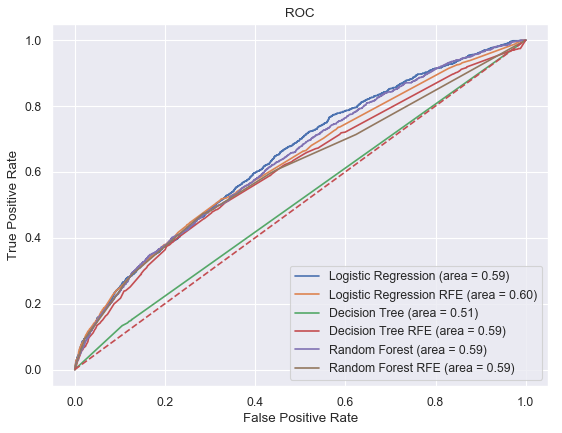

In [1084]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc_logmodel = roc_auc_score(y_test, logmodel.predict(X_test))
logit_roc_auc_logmodel_rfe = roc_auc_score(y_test, logmodel_rfe.predict(X_test[ls]))

logit_roc_auc_tree = roc_auc_score(y_test, model_tree.predict(X_test))
logit_roc_auc_tree_rfe = roc_auc_score(y_test, model_tree_rfe.predict(X_test[ls]))

logit_roc_auc_rf = roc_auc_score(y_test, model_rf.predict(X_test))
logit_roc_auc_rf_rfe = roc_auc_score(y_test, model_rf_rfe.predict(X_test[ls]))


fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
fpr_log_rfe, tpr_log_rfe, thresholds_log_rfe = roc_curve(y_test, logmodel_rfe.predict_proba(X_test[ls])[:,1])

fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, model_tree.predict_proba(X_test)[:,1])
fpr_tree_rfe, tpr_tree_rfe, thresholds_tree_rfe = roc_curve(y_test, model_tree_rfe.predict_proba(X_test[ls])[:,1])

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
fpr_rf_rfe, tpr_rf_rfe, thresholds_rf_rfe = roc_curve(y_test, model_rf_rfe.predict_proba(X_test[ls])[:,1])

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_logmodel)
plt.plot(fpr_log_rfe, tpr_log_rfe, label='Logistic Regression RFE (area = %0.2f)' % logit_roc_auc_logmodel_rfe)

plt.plot(fpr_tree, tpr_tree, label='Decision Tree (area = %0.2f)' % logit_roc_auc_tree)
plt.plot(fpr_tree_rfe, tpr_tree_rfe, label='Decision Tree RFE (area = %0.2f)' % logit_roc_auc_tree_rfe)

plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % logit_roc_auc_rf)
plt.plot(fpr_rf_rfe, tpr_rf_rfe, label='Random Forest RFE (area = %0.2f)' % logit_roc_auc_rf_rfe)

#plt.plot(t, a, 'r') 
#from matplotlib.pyplot import figure

plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
#plt.savefig(‘Log_ROC’)
plt.show()

### Evaluating the best model